In [1]:
### 1. Library Imports and Excel File Read-in

import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_excel('/Users/mburley/Desktop/2023 Oakley Data/2023_Oakley_Transactions_Master.xlsx') #Reads in data from excel file
print(df.tail(5))

    Date Bought 2021 Date Bought 2022 Date Bought 2023  Date Sold   Website  \
923              NaT              NaN       2023-12-17 2023-12-29   Offerup   
924              NaT              NaN       2023-12-17 2023-12-29   Offerup   
925              NaT              NaN       2023-12-17 2023-12-29   Offerup   
926              NaT              NaN       2023-12-17 2023-12-29   Offerup   
927              NaT              NaN       2023-12-23 2023-12-29  Facebook   

    State Bought    Frame Style Frame Color                  Lenses  Paid  \
923           CA    Fast Jacket   Jet Black                  G30 IR  20.0   
924           CA    Flak Jacket       White         Prizm Field XLJ  20.0   
925           CA    Half Jacket   Jet Black               Persimmon  20.0   
926           CA      Radarlock   Jet Black  Gold IR Polarized Path  20.0   
927           MI  Tank Ornament         NaN                     NaN   0.0   

    Sale Price  Total  Profit*  Shipping Fees*  
923         4

In [2]:
### 2. Drop Columns 

df = df.drop(['Date Bought 2021', 'Date Bought 2022'], 1)
df

TypeError: drop() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
### 3. List Column Data Types

# Convert "Paid' column to float64 by first changing NaN to 0
df['Paid'].fillna(0).astype(float)

# Convert 'Sale Price' column to float64 by first changing NaN to 0
#print(df.loc[pd.to_numeric(df['Sale Price'], errors='coerce').isnull()])
#pd.to_numeric(df['Sale Price']).astype(int)
df["Sale Price"] = df["Sale Price"].astype(str).str.strip().replace("",0).astype(float)

# Convert "Date Bought" column to Datetime
df['Date Bought 2023'].apply(pd.to_datetime)

# Convert "Date Sold" column to Datetime
df['Date Sold'] = pd.to_datetime(df['Date Sold'], errors='coerce')
df['Date Sold'].apply(pd.to_datetime)

# List Data Types
df.dtypes

Date Bought 2023    datetime64[ns]
Date Sold           datetime64[ns]
Website                     object
State Bought                object
Frame Style                 object
Frame Color                 object
Lenses                      object
Paid                       float64
Sale Price                 float64
Total                       object
Profit*                    float64
Shipping Fees*             float64
dtype: object

In [ ]:
### 4. Describe Data

df.describe()


,Paid,Sale Price,Profit*,Shipping Fees*
count,1265.000000,688.000000,687.000000,635.000000
mean,67.173660,158.580669,76.033843,4.426031
std,72.451058,147.232143,71.804513,1.854890
min,0.000000,0.000000,-20.820000,3.260000
25%,20.000000,65.000000,34.255000,3.885000
50%,50.000000,125.000000,58.110000,4.090000
75%,85.000000,190.000000,90.880000,4.240000
max,650.000000,1250.000000,670.000000,23.770000


In [ ]:
### 5. Find Sum Totals for "Paid", "Sale Price", "Profit", "Shipping Fees" Columns

print("Total Spent on Inventory Acqiusition: $" + df['Paid'].sum().astype(str))
print("Total Amount Sold: $" + df['Sale Price'].sum().astype(str))
print("Total Spent on Shipping Fees: $" + df['Shipping Fees*'].sum().astype(str))
print("Total Net Profit: $" + df['Profit*'].sum().astype(str))

Total Spent on Inventory Acqiusition: $84974.68000000001
Total Amount Sold: $109103.5
Total Spent on Shipping Fees: $2810.5299999999997
Total Net Profit: $52235.25


Frame Style
M Frame            27
Jawbone            22
Eye Jacket         21
Juliet             19
M Frame Pro        18
Straight Jacket    18
Radar              17
Minute             16
Racing Jacket      14
Monster Dog        12
Name: Sale Price, dtype: int64

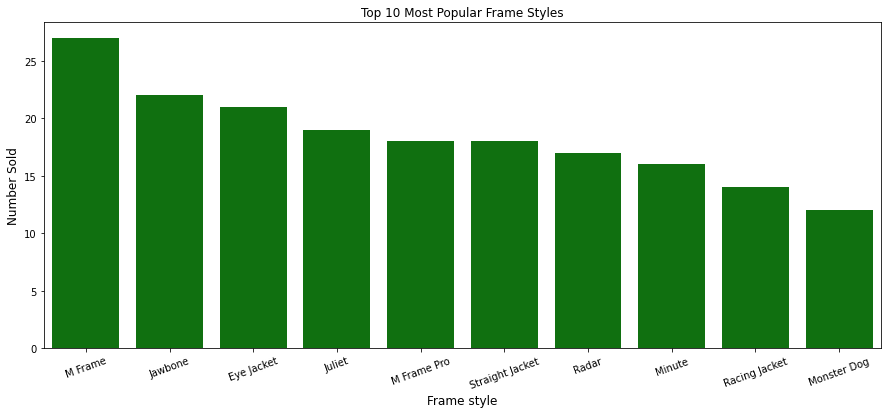

In [ ]:
### 6. Top 10 Most Popular Frame Styles

# Count 'Frame Style' values based on 'Sale Price' entries counted up, and sort the counted 'Paid' values highest to lowest, display Top 10
freq_frames_sold = df.groupby('Frame Style').count().sort_values(['Sale Price'], ascending=False)['Sale Price'].head(10)
display(freq_frames_sold)

### Graph:

# Create Seaborn Barplot and rename y label
plt.figure(figsize=(15,6))
# x = 'Values Displayed for x axis' and y = 'Values Displayed for y axis' and data = location data is being pulled in from
chart6 = sns.barplot(x = 'Frame Style', y = 'Sale Price', data = freq_frames_sold.reset_index(), color = "green")
plt.xlabel('Frame style', size = 12)
plt.ylabel('Number Sold', size = 12)
chart6.set_title('Top 10 Most Popular Frame Styles', size = 12)
# Rotates x axis values
chart6.set_xticklabels(chart6.get_xticklabels(), rotation=20)
plt.show()

,Date Bought 2023,Date Sold,Website,State Bought,Frame Style,Frame Color,Lenses,Paid,Sale Price,Total,Profit*,Shipping Fees*
1069,2023-07-24,2023-07-07,Craigslist,IL,Romeo 1,X-Metal,Black IR,650.0,1250.0,1078.47,428.47,10.73
904,2023-05-16,2023-05-26,Facebook,MI,OTT,FMJ,Ice IR,550.0,1200.0,1049.37,499.37,5.86
606,2023-02-01,2023-02-21,Forum,CA,M Frame Gen 1,Snakeskin,Black IR Heater,500.0,850.0,850,350.00,23.76
607,2023-02-01,2023-02-21,Forum,CA,M Frame Gen 1,Snakeskin Red,Positive Red IR Heater,500.0,850.0,850,350.00,23.77
307,NaT,2023-01-30,Offerup,CA,Penny,Titanium,VR28 IR,400.0,800.0,647.15,247.15,4.12
482,2023-01-05,2023-03-08,eBay,PA,XX,24K Gold,24K Gold IR,400.0,800.0,800,400.00,9.81
833,2023-04-22,2023-09-13,Facebook,GA,X Squared,Ducati,Black IR,400.0,800.0,692.84,292.84,7.84
579,2023-01-31,2023-02-23,Forum,TN,Mars,X-Metal,Black IR,400.0,725.0,725,325.00,8.52
137,NaT,2023-01-21,Facebook,MT,Racing Jacket Pro,Orange,Persimmon to Black Trans,120.0,700.0,565.25,445.25,8.89
161,NaT,2023-07-26,Facebook,IA,Razor Blade,Jungle Camo,Grey Slit,300.0,700.0,615.62,315.62,NaN


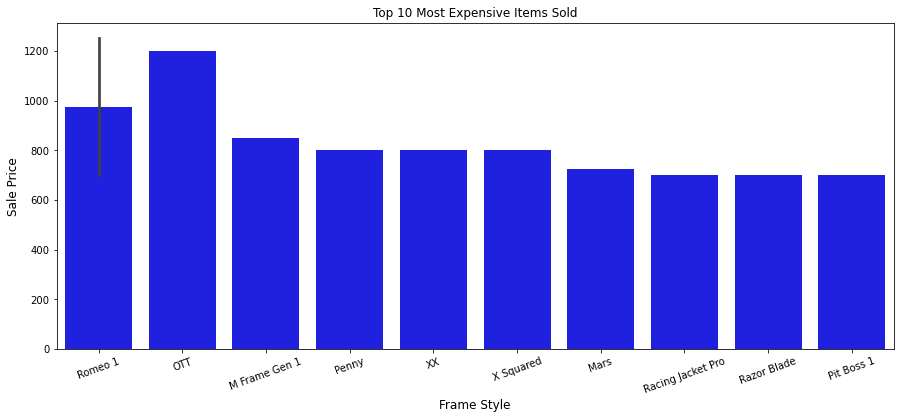

In [ ]:
### 7. Top 10 Most Expensive Items Sold

# .nlargest(how many largest values shown, in which columns)
df7 = df.nlargest(10, ['Sale Price'], keep = 'all')
display(df7)

### Graph:

plt.figure(figsize=(15,6))
chart7 = sns.barplot(x = 'Frame Style', y = 'Sale Price', data = df7, color = "Blue")
plt.xlabel('Frame Style', size = 12)
plt.ylabel('Sale Price', size = 12)
chart7.set_title('Top 10 Most Expensive Items Sold', size = 12)
chart7.set_xticklabels(chart7.get_xticklabels(), rotation=20)
plt.show()

Website
Facebook      791
eBay          206
Forum         131
Offerup        69
OfferUp        18
OF             15
Craigslist     12
Goodwill        9
OF              5
Poshmark        4
Mercari         2
Oakley.com      1
ShoePalace      1
oakley.com      1
Name: Paid, dtype: int64

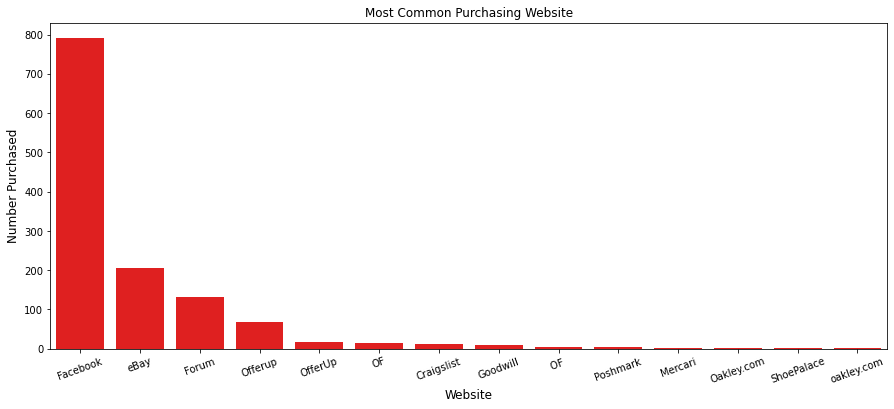

In [ ]:
### 8. Most Common Purchasing Website

# Display 'Website' and count(), and display values in the 'Paid' column from high to low, ['Paid'] at end means display ONLY that col
freq_websites = df.groupby('Website').count().sort_values(['Paid'], ascending = False)['Paid']
display(freq_websites)
# df['Location'].count()

### Graph:

# Create Seaborn Barplot and rename y label
plt.figure(figsize=(15,6))
# x = 'Values Displayed for x axis' and y = 'Values Displayed for y axis' and data = location data is being pulled in from
chart8 = sns.barplot(x = 'Website', y = 'Paid', data = freq_websites.reset_index(), color = "red")
plt.xlabel('Website', size = 12)
plt.ylabel('Number Purchased', size = 12)
chart8.set_title('Most Common Purchasing Website', size = 12)
# Rotates x axis values
chart8.set_xticklabels(chart8.get_xticklabels(), rotation = 20)
plt.show()

In [ ]:
### 9. Compute Total Amount Purchased and Sold from Each Website

# Display Amount Purchased from each Website
sum_per_website = df.groupby(['Website']).sum().sort_values(['Paid'], ascending = False)['Paid']
display(sum_per_website)

# Display Amount Sold from each Website
sum_sold_website = df.groupby(['Website']).sum().sort_values(['Sale Price'], ascending = False)['Sale Price']
display(sum_sold_website)

### Graph: 

# Create df with website and summed values
df9 = df.groupby(['Website']).sum().sort_values(['Paid'], ascending = False).drop(['Profit*', 'Shipping Fees*'], 1)
display(df9)

Website
Facebook      45973.46
eBay          17013.57
Forum         10387.65
Offerup        3681.67
Craigslist     2705.00
OF             1517.94
OF             1045.00
OfferUp        1025.80
Goodwill        772.96
ShoePalace      241.70
oakley.com      241.06
Oakley.com      219.93
Poshmark         93.75
Mercari          55.19
Name: Paid, dtype: float64

Website
Facebook      67378.5
eBay          14551.0
Forum         14482.0
Offerup        5409.0
Craigslist     1990.0
OF             1965.0
Goodwill       1125.0
OfferUp         993.0
oakley.com      540.0
OF              530.0
Poshmark        140.0
Mercari           0.0
Oakley.com        0.0
ShoePalace        0.0
Name: Sale Price, dtype: float64

,Paid,Sale Price
Website,,
Facebook,45973.46,67378.5
eBay,17013.57,14551.0
Forum,10387.65,14482.0
Offerup,3681.67,5409.0
Craigslist,2705.00,1990.0
OF,1517.94,1965.0
OF,1045.00,530.0
OfferUp,1025.80,993.0
Goodwill,772.96,1125.0


In [ ]:
### 10. Count the Number of Items Bought and Sold

total_bought = df['Paid'].count().astype(str)
print("Total Number of Items bought: " + total_bought)

total_sold = df['Sale Price'].count().astype(str)
print("Total Number of Items Sold: " + total_sold)

print("\n")

### 10.5. Count the Number of Complete Pairs Bought and Sold

total_complete_bought = df.dropna(axis=0, subset=['Frame Color', 'Lenses']).count().astype(str)['Paid']
print("Total Number of Complete Pairs bought: " + total_complete_bought)

total_complete_sold = df.dropna(axis=0, subset=['Frame Color', 'Lenses']).count().astype(str)['Sale Price']
print("Total Number of Complete Pairs sold: " + total_complete_sold)

Total Number of Items bought: 1265
Total Number of Items Sold: 688


Total Number of Complete Pairs bought: 821
Total Number of Complete Pairs sold: 485


In [ ]:
### 11. Most profitable Frame Style Based on Avg Sale of all counted "Frame Styles" (Tests profitability vs. availibility)
## Ex. (M Frame Avg Profit) * (Number of M Frames Sold / Total Frames Sold)

# Create var = Grouped Frame Style Values
group = df.groupby('Frame Style', sort = False)
#group

# Using group var, find mean of profit values for each frame, times counted frame sold / total sold like Example above and sort
weighted_profit = group['Profit*'].sum()*(group['Profit*'].count().astype(float)/total_sold.astype(float))
weighted_profit.sort_values(ascending = False).head(15)

Frame Style
Juliet             95.491017
M Frame            68.979506
Eye Jacket         65.722980
Jawbone            53.130320
Straight Jacket    39.887529
M Frame Pro        39.106047
Minute             29.953256
Racing Jacket      24.486977
Radar              23.912674
Splice             21.099564
M Frame Gen 1      15.488488
Razor Blade        14.564535
Monster Dog        14.204128
Mag M Frame         8.875552
XX                  7.805000
Name: Profit*, dtype: float64

Weekday Bought
Sunday       227
Wednesday    141
Monday       110
Tuesday       97
Friday        84
Thursday      82
Saturday      65
Name: Paid, dtype: int64

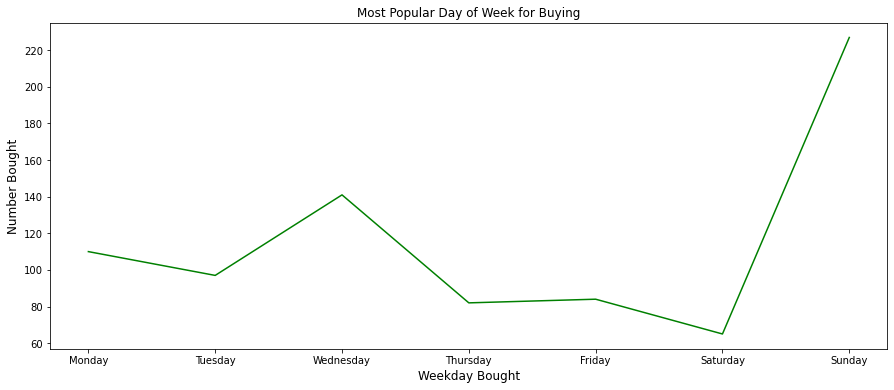

In [ ]:
### 12. Most Popular Day of Week for Buying 2023

## Most Popular Buying Day
# Insert Weekday Column for day of the week bought in form df.insert(position, 'name_of_column', what you're doing)
#df.insert(1, 'Weekday Bought', df['Date Bought'].dt.day_name())
# Create Weekday Bought Column  by converting 'Date Bought' to day of week name
df['Weekday Bought'] = df['Date Bought 2023'].dt.day_name()
#df.tail(10)

# Count each day of week value in "Weekday Bought" and list high to low
df12 = df.groupby('Weekday Bought').count().sort_values(['Paid'], ascending = False)['Paid']
display(df12)

### Graph:
# Reset Index and do Custom Sorting
df12 = df12.reset_index()
df12['Weekday Bought'] = pd.Categorical(df12['Weekday Bought'],
                            categories=['Monday', 'Tuesday', 'Wednesday',
                                        'Thursday', 'Friday', 'Saturday', 'Sunday'],
                            ordered=True)
df12 = df12.sort_values('Weekday Bought')

# Generate Line Graph with x = Weekday Bought (Mon - Sun) and y = Counted Paid Values
plt.figure(figsize=(15,6))
chart12 = sns.lineplot(x = 'Weekday Bought', y = 'Paid', data = df12, color = "green")
plt.xlabel('Weekday Bought', size = 12)
plt.ylabel('Number Bought', size = 12)
chart12.set_title('Most Popular Day of Week for Buying', size = 12)
plt.show()

In [ ]:
### 13. Compute Profit Acquired on Each Day of Week from above Data -> Display 'Weekday Bought' and "Profit*"

# as_index = FALSE says we don't want to set the column ID as the index!
df.groupby(['Weekday Bought'], as_index = False)['Profit*'].sum().sort_values(['Profit*'], ascending = False)

,Weekday Bought,Profit*
3,Sunday,7599.64
6,Wednesday,7111.61
5,Tuesday,4124.33
4,Thursday,3583.56
0,Friday,3371.34
1,Monday,3249.83
2,Saturday,2993.78


Weekday Sold
Friday       116
Monday       109
Tuesday      103
Saturday     100
Wednesday     87
Sunday        85
Thursday      85
Name: Sale Price, dtype: int64

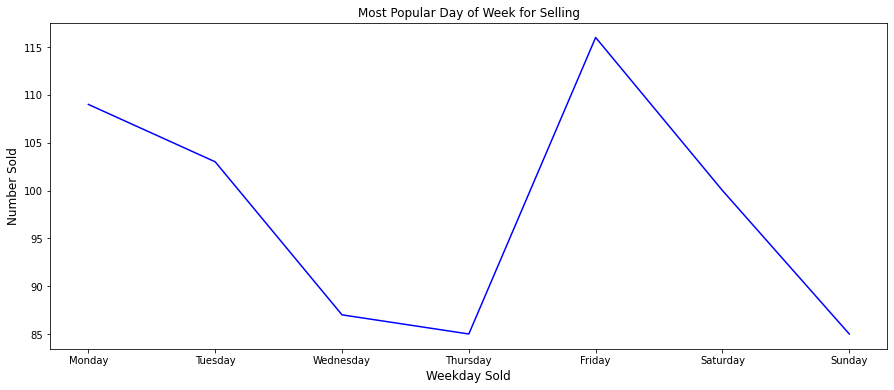

In [ ]:
### 14. Most Popular Day of Week for Selling

## Most Popular Selling Day
# Insert Weekday Column for day of the week Sold in form df.insert(position, 'name_of_column', what you're doing)
df['Weekday Sold'] = df['Date Sold'].dt.day_name()
#df.tail(10)

# Count each day of week value in "Weekday Bought" and list high to low
df14 = df.groupby('Weekday Sold').count().sort_values(['Sale Price'], ascending = False)['Sale Price']
display(df14)

### Graph:
# Reset Index and do Custom Sorting
df14 = df14.reset_index()
df14['Weekday Sold'] = pd.Categorical(df14['Weekday Sold'],
                            categories=['Monday', 'Tuesday', 'Wednesday',
                                        'Thursday', 'Friday', 'Saturday', 'Sunday'],
                            ordered=True)
df14 = df14.sort_values('Weekday Sold')

# Generate Line Graph with x = Weekday Sold (Mon - Sun) and y = Counted Sale Price Values
plt.figure(figsize=(15,6))
chart14 = sns.lineplot(x = 'Weekday Sold', y = 'Sale Price', data = df14, color = "blue")
plt.xlabel('Weekday Sold', size = 12)
plt.ylabel('Number Sold', size = 12)
chart14.set_title('Most Popular Day of Week for Selling', size = 12)
plt.show()

,Weekday Sold,Sale Price
0,Friday,19004.5
5,Tuesday,17422.0
6,Wednesday,16726.5
2,Saturday,14824.0
1,Monday,14697.0
3,Sunday,13989.5
4,Thursday,12090.0


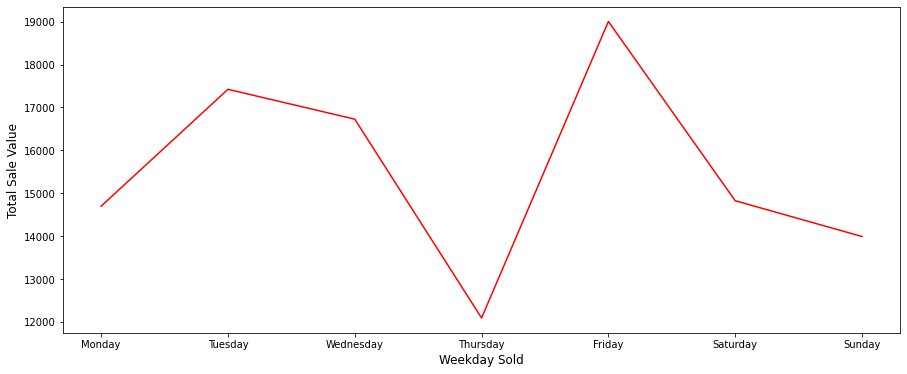

In [ ]:
### 15. Compute Amount Sold on Each Day of Week from above Data -> Display 'Weekday Sold' and 'Sale Price'

# as_index = FALSE says we don't want to set the column ID as the index!
df15 = df.groupby(['Weekday Sold'], as_index = False)['Sale Price'].sum().sort_values(['Sale Price'], ascending = False)
display(df15)

### Graph:
# Reset Index and do Custom Sorting
df15 = df15.reset_index()
df15['Weekday Sold'] = pd.Categorical(df15['Weekday Sold'],
                            categories=['Monday', 'Tuesday', 'Wednesday',
                                        'Thursday', 'Friday', 'Saturday', 'Sunday'],
                            ordered=True)
df15 = df15.sort_values('Weekday Sold')

# Generate Line Graph with x = Weekday Sold and y = Summed Sale Price Values
plt.figure(figsize=(15,6))
chart15 = sns.lineplot(x = 'Weekday Sold', y = 'Sale Price', data = df15, color = "red")
plt.xlabel('Weekday Sold', size = 12)
plt.ylabel('Total Sale Value', size = 12)
chart12.set_title('Amount Sold on Each Day of Week', size = 12)
plt.show()

In [ ]:
### 16. Best Week For Buying

# Best Week for Buying (Week with Most Bought)
# Creates "Week Bought" column and sets it equal to the week number from the date of the item sold
df['Week Bought'] = df['Date Bought 2023'].dt.strftime('%U')
df.tail(30)
df.groupby('Week Bought').sum().sort_values(['Paid'], ascending = False).head(10)['Paid']

Week Bought
05    5355.92
31    3726.25
17    2549.13
15    2505.95
30    2288.11
39    2253.69
20    1968.78
38    1862.13
14    1850.27
33    1828.05
Name: Paid, dtype: float64

In [ ]:
### 17. Best Month For Buying 

# Best Month for Buying
# Creates "Month Bought" column and sets it equal to the month number from the date of the item bought then converts to Month Names in datetime dtype
df['Month Bought'] = pd.to_datetime(df['Date Bought 2023'], format='%m').dt.month_name().str.slice(stop=12)

# Group "Month Bought" then sum, sort and display "Paid" values
df.groupby('Month Bought').sum().sort_values(['Paid'], ascending = False)['Paid']

Month Bought
April        8292.41
August       7495.25
July         7175.83
February     7087.80
January      6666.97
September    5764.44
March        3996.67
June         3606.02
May          3500.59
October      1563.36
November     1337.83
December       86.42
Name: Paid, dtype: float64

In [ ]:
### 18. Best Month For Selling 

# Best Month for Selling
# Creates "Month Sold" column and sets it equal to the month number from the date of the item sold then converts it to a Month Name and datetime dtype
df['Month Sold'] = pd.to_datetime(df['Date Sold'], format='%m').dt.month_name()

# Group "Month Sold" then sum, sort and display "Sale Price" values
df.groupby('Month Sold').sum().sort_values(['Sale Price'], ascending = False).head(10)['Sale Price']

Month Sold
June         18951.5
May          15674.0
January      14018.0
July         12887.0
March        12309.0
February     12011.0
April        10580.0
September     9006.0
August        3317.0
Name: Sale Price, dtype: float64

In [ ]:
### 19. Compute the Avg Number of Items Bought/Sold Per Day -> Total Bought/Sold(Prompt 10) / Total Days

# Compute Total Number of Days
least_recent_date = dt(2023, 1, 1)
most_recent_date = df['Date Bought 2023'].max()
#print(most_recent_date)
time_delta = most_recent_date - least_recent_date
#print(time_delta)

# Convert time_delta from timedelta to float
total_days = time_delta.total_seconds() / (24 * 60 * 60)
#print(total_days)


## Avg Number of Pairs Bought Per Day
bought_2023 = total_bought.astype(float) - 161
#print(bought_2022)
avg_bought_per_day = (bought_2023.astype(float) / total_days).astype(str)
print("The Average Number of Items Bought per day is: " + avg_bought_per_day)


## Avg Number of Pairs Sold Per Day
#print(total_sold)
avg_sold_per_day = (total_sold.astype(float) / total_days).astype(str)
print("The Average Number of Items Sold per day is: " + avg_sold_per_day)


The Average Number of Items Bought per day is: 3.2955223880597013
The Average Number of Items Sold per day is: 2.053731343283582


In [ ]:
### 20. Count Total Number of Pairs Bought from each State

# Display Amount Purchased from each Website
pairs_from_state = df.value_counts(['State Bought'])
display(pairs_from_state.head(10))

State Bought
CA              248
TX               71
MN               64
NH               64
SWE              60
PA               51
GA               47
ID               43
FL               41
OR               35
dtype: int64

In [ ]:
### 21. Coumpute Total Amount Bought from each State

# Group "State Bought" then sum, sort and display "Paid" values
df.groupby('State Bought').sum().sort_values(['Paid'], ascending = False).head(10)['Paid']

State Bought
CA    16808.18
MN     4754.04
PA     4417.69
TX     3742.37
FL     3286.67
NH     3029.00
IL     2800.87
OR     2666.12
CO     2430.67
GA     2423.49
Name: Paid, dtype: float64

In [ ]:
### 22. Compute Total Profit Aquired from each State

# Group "State Bought" then sum, sort and display "Profit*" values
df.groupby('State Bought').sum().sort_values(['Profit*'], ascending = False).head(10)['Profit*']

State Bought
CA    9981.51
MN    3643.22
PA    3547.18
TX    3017.97
NH    2499.21
GA    2486.90
TN    1641.58
CO    1585.58
ID    1455.52
OR    1433.79
Name: Profit*, dtype: float64

In [ ]:
### 23. Compute Avg Amount Bought Per Week in 2023 -> (Total Bought in 2023 / Num Weeks)

# Compute the total amount bought 
total_bought_just_2023 = (df['Paid'].sum() - 28406.09) #28406.09 is the amount of sold inventory purchased BEFORE 2023
#print(total_bought)

# Count the number of weeks
df['Week Bought'] = df['Week Bought'].astype(str).str.strip().replace("",0).astype(float)
count_weeks = df['Week Bought'].max()
#print(count_weeks)

# Computation
avg_bought_per_week = (total_bought_just_2023) / (count_weeks + 1)
print("The average amount bought per week is: $" + avg_bought_per_week.round(2).astype(str))

The average amount bought per week is: $1154.46


In [ ]:
### 24. Compute Avg Number of Items bought per week

# Load in total number of pairs bought
num_bought_just_2023 = df['Paid'].count() - 460 #460 is the number of items purchased in BEFORE 2023
print(total_bought)

# Count total number of weeks
#print(count_weeks)

# Divide total bought divided by total weeks to compute AVG
avg_num_bought_per_week = (num_bought_just_2023 / count_weeks)
#str(avg_num_bought_per_week)
print("The avg number of items purchased per week is: " + avg_num_bought_per_week.round(2).astype(str))

1265
The avg number of items purchased per week is: 16.77


In [ ]:
### 25. Compute Net Profit Margin (Profiability) as a Percentage of Revenue

total_profit = df['Profit*'].sum()
total_profit

total_revenue = df['Sale Price'].sum()
total_revenue

total_ship_costs = df['Shipping Fees*'].sum()
total_ship_costs

# Compute Post Shipping fee Net Profit Margin
profitability = (total_profit - total_ship_costs) / total_revenue
percentage = "{:.2%}".format(profitability)
print('The Net Profit Margin is: ' + percentage)

The Net Profit Margin is: 45.30%


In [ ]:
### 26. Compute Inventory Assets vs. COGS (Total amount of inventory and total amount sold)

# Create Inventory data frame by selecting rows where the Sale Price column values are Null 
df_inv = df[df['Sale Price'].isnull()]
df_inv.head(10)

# Sum Paid column values in df_inv to get total current inventory assets
total_inv = df_inv['Paid'].sum()
print("The total current inventory asset amount is: $" + total_inv.round(2).astype(str))

# Create COGS data frame by selecting rows where the Sale Price column values are NOT Null 
df_cogs = df[df['Sale Price'].notnull()]
df_cogs.head(10)

# Sum Paid column values in df_inv to get total current inventory assets
total_cogs = df_cogs['Paid'].sum()
print("The total COGS is: $"+ total_cogs.round(2).astype(str))

The total current inventory asset amount is: $39078.9
The total COGS is: $45895.78
